<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/pytorch/week01/pytorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [26]:
import torch
import matplotlib.pyplot as plt
from torch import nn  # nn contains all of pytorchs building blocks for neural netowrks

# **CREATING DATA**

In [59]:
# STEP-1 CREATING OUR DATA

# create known parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)  #features
y = (weight * X) + bias   #label

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [60]:
# now we split our data into trainig , validation and testing datasets
# for now just trainig and testing sets

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [61]:
len(X_train) ,len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [62]:
# now we would like to plot our train data , test data , and our predictions

def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  plt.figure(figsize=(10,7))

  # plotting our traing data in blue
  plt.scatter(train_data, train_labels,c='b',s=4, label='Training data')

  # plotting out test data in green
  plt.scatter(test_data, test_labels, c='g',s=4, label='Testing data')

  if predictions is not None:
    # plotting our predcitions in red ,(they are made on the train_data)
    plt.scatter(test_data, predictions, c='r',s=4, label='Our predcitions')

  plt.legend()
  plt.show()


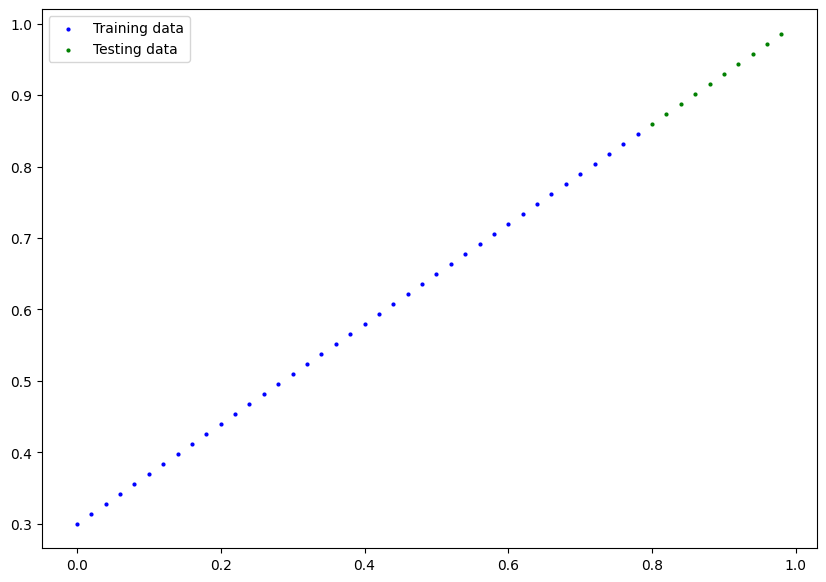

In [63]:
plot_prediction()

# **BUILDING A MODEL**

In [64]:
# creating a linear regression model class

class LinearRegressionModel(nn.Module):   # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
  def __init__(self):
    super().__init__()
    # initialise model parameters
    self.weights = nn.Parameter(torch.randn(1,# <- start with random weights (this will get adjusted as the model learns)
                                            dtype=torch.float,# <- PyTorch loves float32 by default
                                            requires_grad=True)) # <- can we update this value with gradient descent? YES , so true


    self.bias = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                          dtype=torch.float, # <- PyTorch loves float32 by default
                                          requires_grad = True)) # <- can we update this value with gradient descent?, YES , so true

  # Forward defines the computation in the model
  def forward(self, x:torch.Tensor):  # <- "x" is the input data (e.g. training/testing features)
    return self.weights * x + self.bias   # <- this is the linear regression formula (y = m*x + b)

In [65]:
# checking the contents of the pytorch model

# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# an instance of the model
model_0 = LinearRegressionModel()

# checking the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [66]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [67]:
# Making predictions with the model
# inference basically means prediction
# torch.inference_mode() turns off a bunch of things (like gradient tracking,
#  which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.
with torch.inference_mode():
  y_preds = model_0(X_test)

In [68]:
print(f"len of test dataset: {len(X_test)}")
print(f"len of predictions dataset: {len(y_preds)}")
print(f"predicted values: {y_preds}")

len of test dataset: 10
len of predictions dataset: 10
predicted values: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


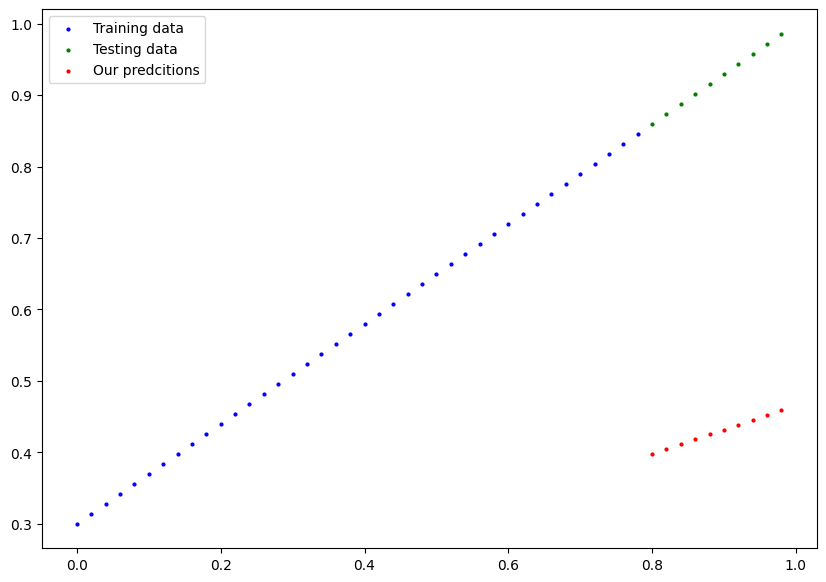

In [69]:
plot_prediction(predictions = y_preds)

# pretty bad predictions
# obviously as we have not yet used the blue dots or the training dataset
# to train our model and we have directly jumped to predict on the test dataset
# with some random weight and bias

In [70]:
y_test-y_preds
# PRETTY BAD PREDICTIONS

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# **TRAINING OUR MODEL**

LOSS

[mean absolute error](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded)

[Binary Cross Entropy](https://chatgpt.com/share/676c9830-c79c-800b-b48d-ecf56c8bcb8c)


Optimiser

[Adam Optimiser](https://chatgpt.com/share/676c9830-c79c-800b-b48d-ecf56c8bcb8c)


In [71]:
# we need a loss function and an optimiser
# loss function will tell us how far we are from the actual values, lesser the loss better
# and the optimiser will tell our model how to update its internal parameters

# since we are trying to predict a number(regression) , we can use MAE loss function
# MAE stands for mean absolute error , it will take the absolute error for each prediction
# sum all of the errors and find the mean ,  torch.nn.L1LOSS()
# or BCE(binary cross entropy) loss for classification problems



# and we will use the SGD (stochastic gradient descent) optimiser
# its just like gradient descent just that it takes small random sets out of the data and perform gradient descent on those
#  torch.optim.SGD(params,lr)
# params means the paramters we had like to optimise ,weight and bias
# lr stands for learning rate , it is also called a hyperparamter
# as it is decided by the machine learning engineers

# creating the loss function

loss_fn = nn.L1Loss()

# creating the optimiser

optimizer = torch.optim.SGD(params = model_0.parameters(),
                   lr=0.01)
# if learning rate is too high , you may overshoot
# if its too low it may take a lot of time
# hence it is a hyperparameter
# even the learning rate can be adjusted over time using something called learning rate scheduling

In [72]:
# Pytorch LOOP
# training and testing loop

torch.manual_seed(42)


# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  ### Training
  # Put model in training mode (this is the default state of a model)
  model_0.train()

  # 1. Forward pass on train data using the forward() method inside
  y_pred = model_0(X_train)
  # print(y_pred)

  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fn(y_pred, y_train)

  # 3. Zero grad of the optimizer
  # optimizer gradients are set to zero
  optimizer.zero_grad()

  # 4. Loss backwards
  # backpropagation on loss
  loss.backward()

  # 5. Progress the optimizer
  optimizer.step()


  # basically the order is something like
  # calculate the loss first , then set all the gradients to zero as they acummulate over epochs
  # then calculate new gradients for parameters which have requires_grad=true , with the help of backpropagation
  # then update the gradients of the optimizer

  ### Testing

  # Put the model in evaluation mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass on test data
    test_pred = model_0(X_test)

    # 2. Caculate loss on test data
    test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

    # Print out what's happening
    if epoch % 10 == 0:
          epoch_count.append(epoch)
          train_loss_values.append(loss.detach().numpy())
          test_loss_values.append(test_loss.detach().numpy())
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

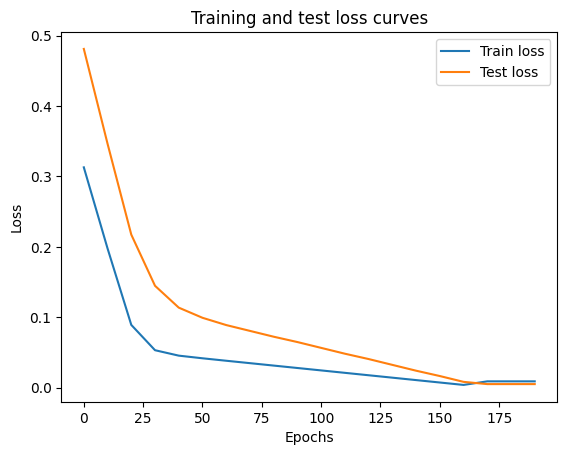

In [73]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [74]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# MAKING PREDICTIONS WITH AN ALREADY TRAINED PyTorch MODEL

In [75]:
# MAKING PREDICTIONS WITH A TRAINED Pytorch MODEL

# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

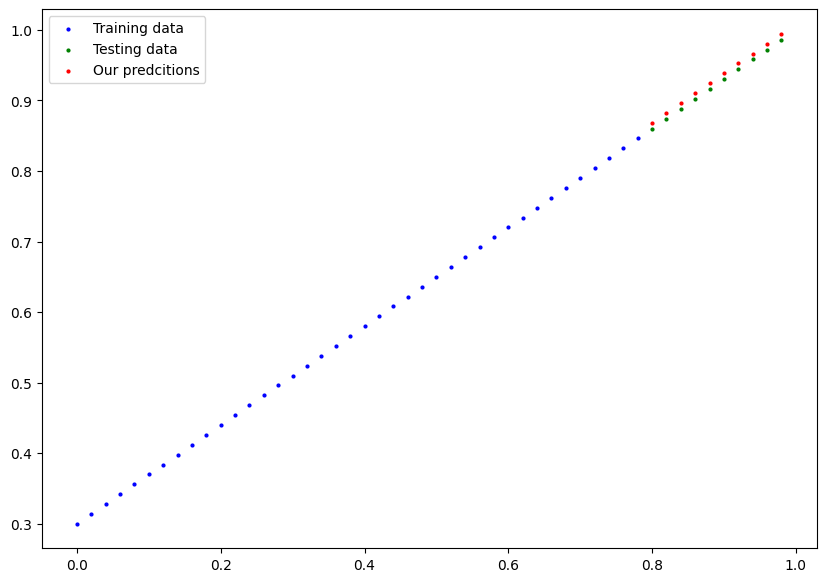

In [76]:
plot_prediction(predictions=y_preds)

# **SAVING AND LOADING A PYTORCH MODEL**

In [77]:
# we only prefer to save the state_dict() or the parameters state of the model,
# and not the model itself for various reasons

# we use 3 syntax

#  torch.save
#  torch.load
#  torch.nn.Module.load_state_dict


In [78]:
# SAVING A MODELS state_dcit()
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)  # this is the file save path location

Saving model to: models/01_pytorch_workflow_model_0.pth


In [79]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Dec 26 00:34 models/01_pytorch_workflow_model_0.pth


In [80]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-80-c3119fcaa06c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [81]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [82]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together

step-0
Initial Setup


In [90]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [91]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

step-1
creating our data

In [140]:
weight=0.6
bias=0.5

x = torch.arange(0,2,0.1,device=device).unsqueeze(dim=1)
y=weight*x + bias
y

tensor([[0.5000],
        [0.5600],
        [0.6200],
        [0.6800],
        [0.7400],
        [0.8000],
        [0.8600],
        [0.9200],
        [0.9800],
        [1.0400],
        [1.1000],
        [1.1600],
        [1.2200],
        [1.2800],
        [1.3400],
        [1.4000],
        [1.4600],
        [1.5200],
        [1.5800],
        [1.6400]])

In [141]:
split = int(0.8*len(x))
X_train,y_train = x[:split] , y[:split]
X_test , y_test = x[split:] , y[split:]

In [142]:
# now we would like to plot our train data , test data , and our predictions

def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
  plt.figure(figsize=(10,7))

  # plotting our traing data in blue
  plt.scatter(train_data, train_labels,c='b',s=4, label='Training data')

  # plotting out test data in green
  plt.scatter(test_data, test_labels, c='g',s=4, label='Testing data')

  if predictions is not None:
    # plotting our predcitions in red ,(they are made on the train_data)
    plt.scatter(test_data, predictions, c='r',s=4, label='Our predcitions')

  plt.legend()
  plt.show()


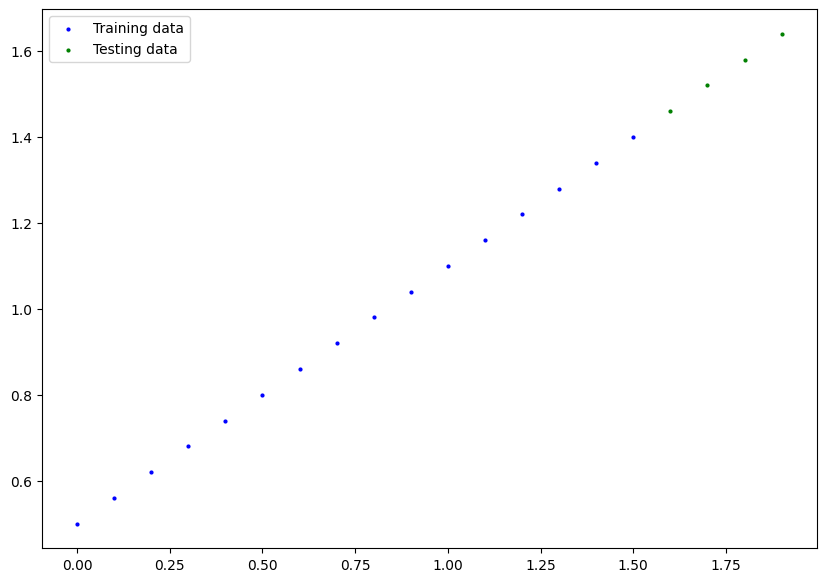

In [143]:
plot_prediction()

Step-2
Building a model


In [144]:
# a completely new LinearRegressionModel using neural network layers
# Parameters Initialization: When you create an nn.Linear layer, PyTorch automatically initializes the following:
# a Weight Matrix (W) of shape (out_features,in_features)
# a Bias Vector (b) a vector of shape (our_features,)


class LinearRegressionModelV1(nn.Module):
    def __init__(self):
      super().__init__()

      # using nn.Linear for creating the model parameters
      self.linearLayer=nn.Linear(in_features=1,
                                 out_features=1)

    def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.linearLayer(x)

torch.manual_seed(42)
model_1=LinearRegressionModelV1()
model_1,model_1.state_dict()

(LinearRegressionModelV1(
   (linearLayer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linearLayer.weight', tensor([[0.7645]])),
              ('linearLayer.bias', tensor([0.8300]))]))

In [145]:
# checking our predictions without any training
# there is no need of this step

model_1.eval()
with torch.inference_mode():
  y_pred=model_1(X_test)

y_pred

tensor([[2.0533],
        [2.1297],
        [2.2062],
        [2.2826]])

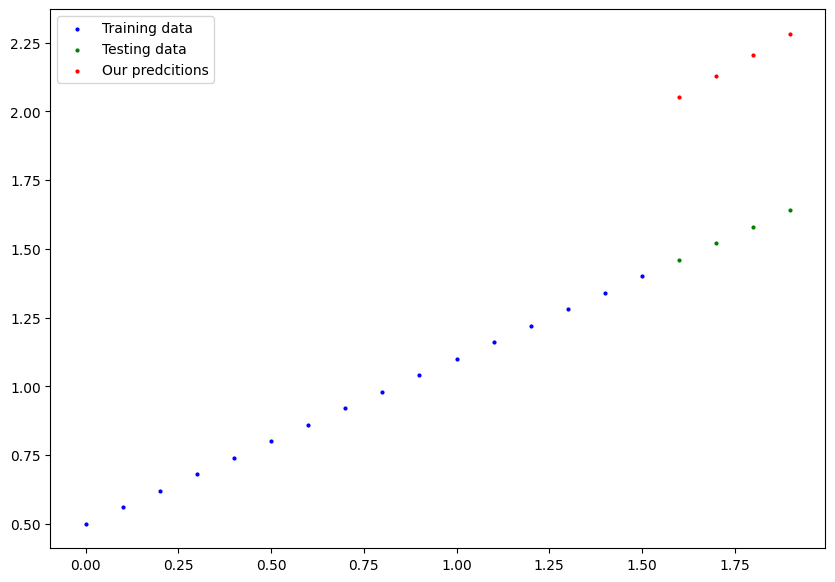

In [146]:
plot_prediction(predictions=y_pred)
# totally off

In [147]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [148]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

Step 3
Training and Testing Loop

In [149]:
# we need a loss and optimisation function

my_loss_fnc=nn.L1Loss()

my_optimizer =torch.optim.SGD(params=model_1.parameters(),
                           lr=0.01)

In [150]:
# now instead of writing everything together we can split into a training and testing function

epochs_arr=[]
train_loss_arr=[]
test_loss_arr=[]

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [151]:
def training_loop(model,loss_fnc,optimizer,data,labels):
  # set model to train mode
  model.train()
  # forward pass
  y_pred=model(data)
  # calculate Loss
  train_loss=my_loss_fnc(y_pred,labels)
  # optimizer zero grad
  my_optimizer.zero_grad()
  # backpropagation
  train_loss.backward()
  # set the gradients
  my_optimizer.step()

  return train_loss

In [152]:
def testing_loop(model,loss_fnc,optimizer,data,labels):
  # set model to eval mode
  model.eval()
  # inference_mode
  with torch.inference_mode():
    y_pred=model(data)
    test_loss=loss_fnc(y_pred,labels)
  return test_loss



In [153]:
torch.manual_seed(42)
epochs=500

for epoch in range(epochs):
  train_loss=training_loop(model_1,my_loss_fnc,my_optimizer,X_train,y_train)
  test_loss=testing_loop(model_1,my_loss_fnc,my_optimizer,X_test,y_test)
  if(epoch%10==0):
    print(f"Epoch: {epoch} | Train loss: {train_loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.4534117877483368 | Test loss: 0.594825267791748
Epoch: 10 | Train loss: 0.2971619665622711 | Test loss: 0.3635755181312561
Epoch: 20 | Train loss: 0.14091208577156067 | Test loss: 0.13232573866844177
Epoch: 30 | Train loss: 0.018940109759569168 | Test loss: 0.03429916501045227
Epoch: 40 | Train loss: 0.009479165077209473 | Test loss: 0.016830533742904663
Epoch: 50 | Train loss: 0.003849536180496216 | Test loss: 0.022486865520477295
Epoch: 60 | Train loss: 0.003849536180496216 | Test loss: 0.022486865520477295
Epoch: 70 | Train loss: 0.003849536180496216 | Test loss: 0.022486865520477295
Epoch: 80 | Train loss: 0.003849536180496216 | Test loss: 0.022486865520477295
Epoch: 90 | Train loss: 0.003849536180496216 | Test loss: 0.022486865520477295
Epoch: 100 | Train loss: 0.003849536180496216 | Test loss: 0.022486865520477295
Epoch: 110 | Train loss: 0.003849536180496216 | Test loss: 0.022486865520477295
Epoch: 120 | Train loss: 0.003849536180496216 | Test loss: 0.02

In [154]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linearLayer.weight', tensor([[0.5968]])),
             ('linearLayer.bias', tensor([0.5063]))])

And the original values for weights and bias are:
weights: 0.6, bias: 0.5


Step 4 PREDICTING USING OUR TRAINED MODEL

In [157]:
model_1.eval()
with torch.inference_mode():
  final_y_pred=model_1(X_test)
final_y_pred

tensor([[1.4611],
        [1.5208],
        [1.5805],
        [1.6402]])

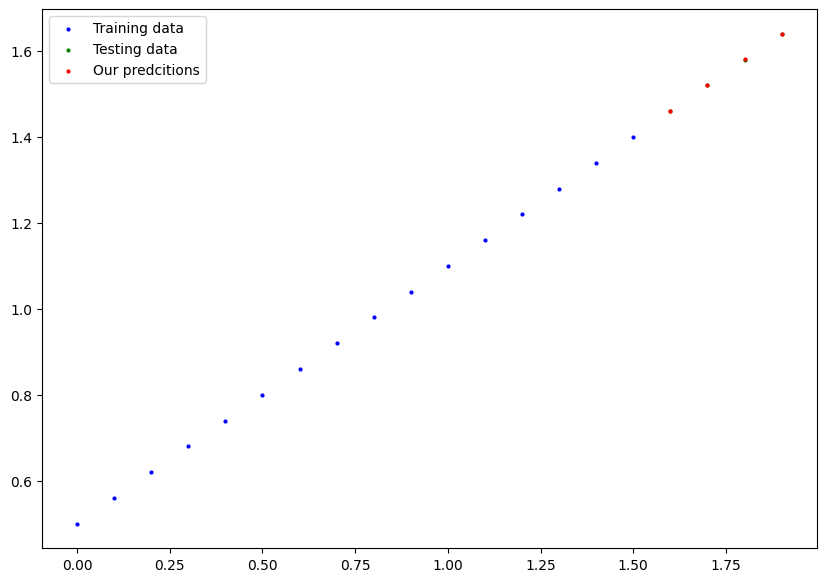

In [160]:
plot_prediction(predictions=final_y_pred)

# so close cant even differentiate

STEP 5 SAVING AND LOADING OUR MODEL

In [161]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [162]:
loaded_model_1=LinearRegressionModelV1()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<ipython-input-162-7a8ed5faf76e>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [163]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
final_y_pred == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True]])

# **EXERCISES**

write device agnostic code

In [165]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1

In [173]:
weight=0.3
bias=0.9
x=torch.arange(0,10,0.1,device=device).unsqueeze(dim=1)
y=weight*x + bias
print(y,y.size(),y.device,len(y))

tensor([[0.9000],
        [0.9300],
        [0.9600],
        [0.9900],
        [1.0200],
        [1.0500],
        [1.0800],
        [1.1100],
        [1.1400],
        [1.1700],
        [1.2000],
        [1.2300],
        [1.2600],
        [1.2900],
        [1.3200],
        [1.3500],
        [1.3800],
        [1.4100],
        [1.4400],
        [1.4700],
        [1.5000],
        [1.5300],
        [1.5600],
        [1.5900],
        [1.6200],
        [1.6500],
        [1.6800],
        [1.7100],
        [1.7400],
        [1.7700],
        [1.8000],
        [1.8300],
        [1.8600],
        [1.8900],
        [1.9200],
        [1.9500],
        [1.9800],
        [2.0100],
        [2.0400],
        [2.0700],
        [2.1000],
        [2.1300],
        [2.1600],
        [2.1900],
        [2.2200],
        [2.2500],
        [2.2800],
        [2.3100],
        [2.3400],
        [2.3700],
        [2.4000],
        [2.4300],
        [2.4600],
        [2.4900],
        [2.5200],
        [2

In [177]:
split=int(0.8*len(x))
X_train,y_train=x[:split] , y[:split]
X_test,y_test=x[split:] , y[split: ]

X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

In [178]:
def plot_prediction(train_data=X_train,train_labels=y_train,
                    test_data=X_test,test_labels=y_test,
                    predictions=None):
  plt.figure(figsize=(5,5))

  plt.scatter(train_data,train_labels,c='b',s=4,label="training data")

  plt.scatter(test_data,test_labels,c='g',s=4,label="testing data")

  if (predictions !=None):
    plt.scatter(test_data,predictions,c="r",s=4,label="prediction")

  plt.legend()
  plt.show()


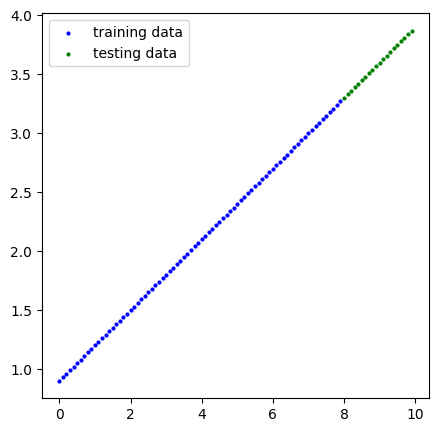

In [179]:
plot_prediction()

# 2


In [186]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linearLayer=nn.Linear(in_features=1,
                              out_features=1)



  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linearLayer(x)


torch.manual_seed(42)
model_3=LinearRegressionModelV2();
print(model_3.state_dict(),next(model_3.parameters()).device)

OrderedDict([('linearLayer.weight', tensor([[0.7645]])), ('linearLayer.bias', tensor([0.8300]))]) cpu


In [187]:
model_3.to(device)
print(next(model_3.parameters()).device)

cpu


# 3


In [193]:
loss_fnc_my=nn.L1Loss();

optimizer_my=torch.optim.SGD(params=model_3.parameters(),
                         lr=0.01)

In [194]:
# Training loop

def training_loop(model,data,labels,loss_fnc,optimizer):
  model.train()
  y_pred=model(data)
  train_loss=loss_fnc(y_pred,labels)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  return train_loss

In [195]:
# testing loop

def testing_loop(model,data,labels,loss_fnc,optimizer):
  model.eval()
  with torch.inference_mode():
    y_pred=model(data)
    test_loss=loss_fnc(y_pred,labels)
  return test_loss


In [196]:
torch.manual_seed(42)
epochs=300

for epoch in range(epochs):
  train_loss = training_loop(model_3,X_train,y_train,loss_fnc_my,optimizer_my)
  if(epoch%20==0):
    test_loss = testing_loop(model_3,X_test,y_test,loss_fnc_my,optimizer_my)
    print(f"Epoch {epoch} | Train loss {train_loss} | Test Loss {test_loss}")

Epoch 0 | Train loss 1.7672735452651978 | Test Loss 3.7248260974884033
Epoch 20 | Train loss 0.07500676810741425 | Test Loss 0.3603351414203644
Epoch 40 | Train loss 0.08991314470767975 | Test Loss 0.26105359196662903
Epoch 60 | Train loss 0.025813329964876175 | Test Loss 0.36515316367149353
Epoch 80 | Train loss 0.037320829927921295 | Test Loss 0.3143957257270813
Epoch 100 | Train loss 0.021646490320563316 | Test Loss 0.3375694155693054
Epoch 120 | Train loss 0.01556048821657896 | Test Loss 0.3450304865837097
Epoch 140 | Train loss 0.013060671277344227 | Test Loss 0.3475303053855896
Epoch 160 | Train loss 0.012310720048844814 | Test Loss 0.3482802212238312
Epoch 180 | Train loss 0.012310720048844814 | Test Loss 0.3482802212238312
Epoch 200 | Train loss 0.012310720048844814 | Test Loss 0.3482802212238312
Epoch 220 | Train loss 0.012310720048844814 | Test Loss 0.3482802212238312
Epoch 240 | Train loss 0.012310720048844814 | Test Loss 0.3482802212238312
Epoch 260 | Train loss 0.012310720

# 4


In [197]:
model_3.eval()
with torch.inference_mode():
  y_pred=model_3(X_test)

In [199]:
y_pred.device

device(type='cpu')

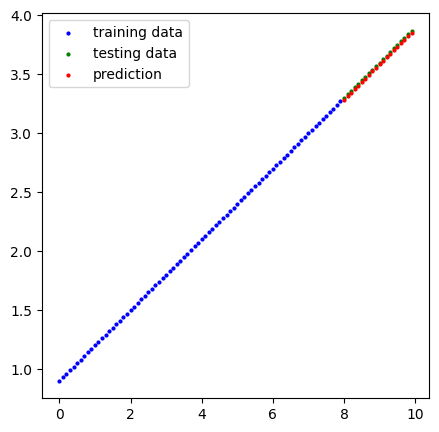

In [198]:
plot_prediction(predictions=y_pred)

# 5

In [200]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)


MODEL_NAME="01_pytorch_model_3.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model_3.state_dict(),f=MODEL_SAVE_PATH)


In [201]:
loaded_model_3=LinearRegressionModelV2()
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-201-17a88170b04a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [202]:
print(model_3.state_dict(),loaded_model_3.state_dict())

OrderedDict([('linearLayer.weight', tensor([[0.2994]])), ('linearLayer.bias', tensor([0.8900]))]) OrderedDict([('linearLayer.weight', tensor([[0.2994]])), ('linearLayer.bias', tensor([0.8900]))])


In [204]:
loaded_model_3.eval()
with torch.inference_mode():
  y_load_pred=loaded_model_3(X_test)
y_load_pred==y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])